
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
Supervised Learning <br>
<font color=696880 size=4>

____

# Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [ ]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    X = np.random.uniform(range_start, range_end, num_samples)
    y = (0.2 * X**6) - (0.5 * X**5) + (2 * X**4) - (5 * X**3) + (3 * X**2) - (10 * X) + 5
    noise = np.random.normal(0, noise_std, num_samples)
    y += noise
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

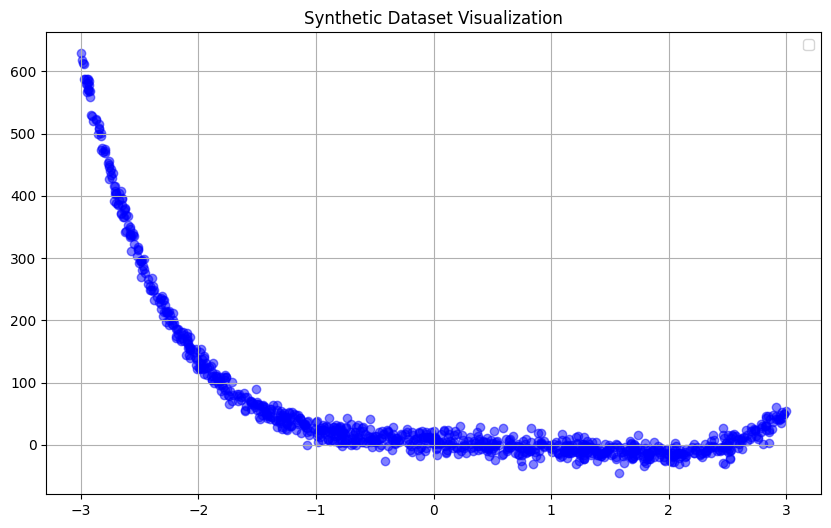

In [ ]:
X, y = generate_dataset(-3, 3)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title('Synthetic Dataset Visualization')
plt.legend()
plt.grid(True)
plt.show()

## 2. Splitting the Dataset

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [ ]:
def split_dataset(X, y, test_size=0.2, random_state=42):
    X_train, X_inrange_test, y_train, y_inrange_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_inrange_test, y_train, y_inrange_test

def generate_out_of_range_test_set(range_start=5, range_end=7, num_samples=200, noise_std=10.0):
    X_out_of_range = np.random.uniform(range_start, range_end, num_samples)
    y_out_of_range = (0.2 * X_out_of_range**6) - (0.5 * X_out_of_range**5) + (2 * X_out_of_range**4) - (5 * X_out_of_range**3) + (3 * X_out_of_range**2) - (10 * X_out_of_range) + 5
    noise = np.random.normal(0, noise_std, num_samples)
    y_out_of_range += noise
    return X_out_of_range, y_out_of_range


Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

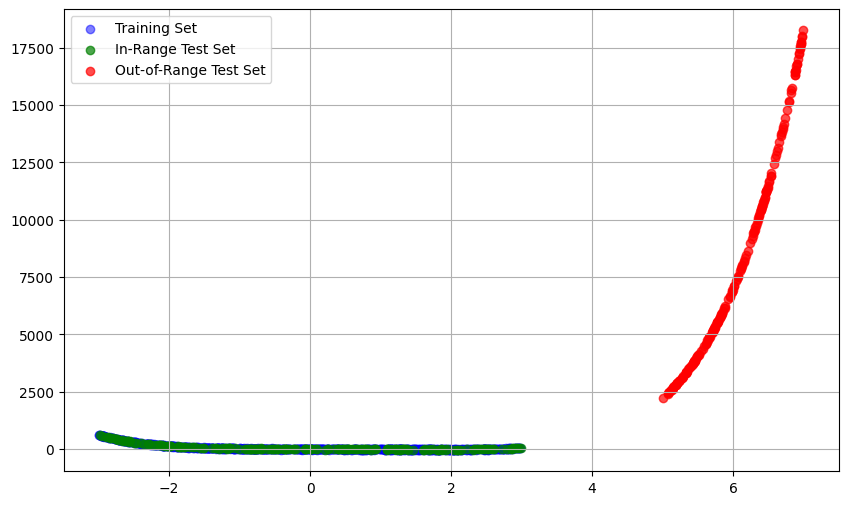

In [ ]:
X_train, X_inrange_test, y_train, y_inrange_test = split_dataset(X, y)

num_inrange_test_samples = len(X_inrange_test)
X_out_of_range, y_out_of_range = generate_out_of_range_test_set(num_samples=num_inrange_test_samples)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Set')

plt.scatter(X_inrange_test, y_inrange_test, color='green', alpha=0.7, label='In-Range Test Set')

plt.scatter(X_out_of_range, y_out_of_range, color='red', alpha=0.7, label='Out-of-Range Test Set')

plt.legend()
plt.grid(True)
plt.show()


## 3. Polynomial Regression Training

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [ ]:
from sklearn.pipeline import Pipeline
def train_models(X, y, degree):
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])

    model.fit(X.reshape(-1, 1), y)

    return model

In [ ]:
models = {}
degree = 9
for d in range(2, degree + 1):
    model = train_models(X_train, y_train, d)
    models[d] = model

## 4. Model Evaluation

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [ ]:
def evaluate_models(models, X_test, y_test):
    losses = {}

    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))

        mse = mean_squared_error(y_test, y_pred)

        losses[degree] = mse

    return losses

In [ ]:
train_mse = evaluate_models(models, X_train, y_train)

in_range_mse = evaluate_models(models, X_inrange_test, y_inrange_test)

out_of_range_mse = evaluate_models(models, X_out_of_range, y_out_of_range)

## 5. Analyzing Model Scores

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

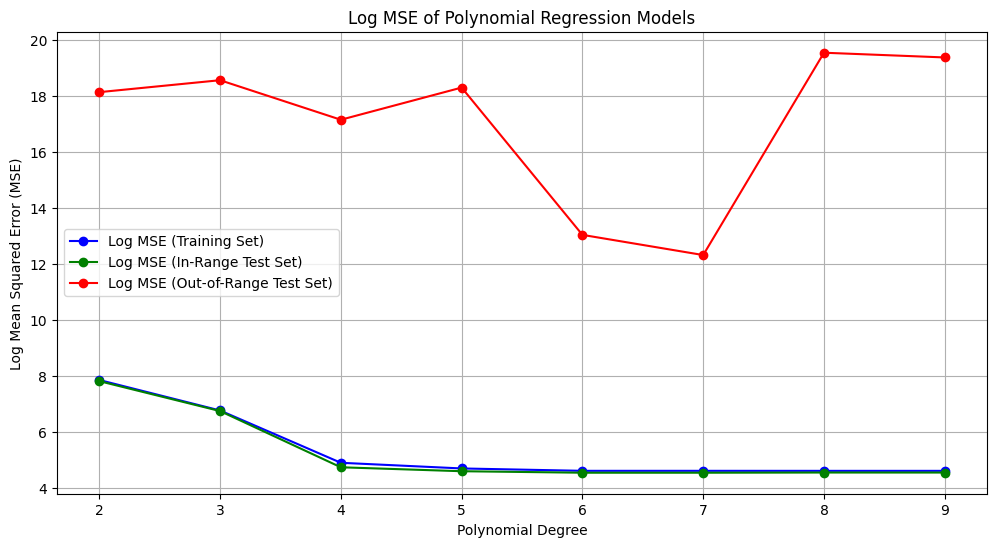

In [ ]:
log_mse_train = []
log_mse_in_range = []
log_mse_out_of_range = []
degrees = range(2, 10)

for degree in degrees:
    mse_train = mean_squared_error(y_train, models[degree].predict(X_train.reshape(-1, 1)))
    mse_in_range = mean_squared_error(y_inrange_test, models[degree].predict(X_inrange_test.reshape(-1, 1)))
    mse_out_of_range = mean_squared_error(y_out_of_range, models[degree].predict(X_out_of_range.reshape(-1, 1)))

    log_mse_train.append(np.log(mse_train))
    log_mse_in_range.append(np.log(mse_in_range))
    log_mse_out_of_range.append(np.log(mse_out_of_range))

plt.figure(figsize=(12, 6))

plt.plot(degrees, log_mse_train, marker='o', label='Log MSE (Training Set)', color='blue')
plt.plot(degrees, log_mse_in_range, marker='o', label='Log MSE (In-Range Test Set)', color='green')
plt.plot(degrees, log_mse_out_of_range, marker='o', label='Log MSE (Out-of-Range Test Set)', color='red')

plt.title('Log MSE of Polynomial Regression Models')
plt.xlabel('Polynomial Degree')
plt.ylabel('Log Mean Squared Error (MSE)')
plt.xticks(degrees)
plt.legend()
plt.grid()
plt.show()

In [ ]:
print("Degree    Train MSE    In-Range Test MSE   Out-of-Range Test MSE")
print("-" * 85)

for degree in range(0, 8):

    print(f"{degree + 2:<8} {log_mse_train[degree]:<15.2f} {log_mse_in_range[degree]:<20.2f} {log_mse_out_of_range[degree]:<22.2f}")


Degree    Train MSE    In-Range Test MSE   Out-of-Range Test MSE
-------------------------------------------------------------------------------------
2        7.86            7.82                 18.14                 
3        6.77            6.75                 18.56                 
4        4.91            4.75                 17.15                 
5        4.70            4.61                 18.30                 
6        4.62            4.55                 13.04                 
7        4.62            4.55                 12.32                 
8        4.62            4.56                 19.54                 
9        4.62            4.56                 19.38                 


## Conclusion

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** As the degree of the polynomial increases, the learning rate usually decreases, indicating less bias but more variance. The test set error in that range initially decreases and then increases, indicating overfitting at higher complexities. The test set error outside that range usually increases with the complexity of the model. This represents the bias-variance tradeoff: simpler models have higher bias and lower variance, while more complex models have lower bias and higher variance.</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:** As the degree of the polynomial increases, the model complexity rises. Initially, performance improves and bias decreases, but with further increase in degree, the model overfits and the test set error increases. Following these trends helps in choosing the appropriate polynomial degree to avoid the risk of overfitting at higher complexities.</span>

# Regularization

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients.

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [ ]:
file_path = "./InsuranceData.csv"
df = pd.read_csv(file_path)
df_main = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [ ]:
# print(df.info())
print(df.describe())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# Preprocessing

In [ ]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


df = pd.get_dummies(df)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

norm_scaler = MinMaxScaler()
df[numerical_cols] = norm_scaler.fit_transform(df[numerical_cols])

standard_scaler = StandardScaler()
df[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

df = df.replace({True: 1, False: 0})

df

<ipython-input-129-8c140fd0d421>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,-0.953689,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,-0.728675,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,0.719843,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,-0.776802,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,0,1,1,0,0,1,0,0
1334,-1.509965,0.206139,-0.908614,-0.914002,1,0,1,0,1,0,0,0
1335,-1.509965,1.014878,-0.908614,-0.961596,1,0,1,0,0,0,1,0
1336,-1.296362,-0.797813,-0.908614,-0.930362,1,0,1,0,0,0,0,1


In [ ]:
X = df.drop('charges', axis=1)
df = pd.get_dummies(df_main)
y = df_main['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

Fit a linear regressor to the data.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

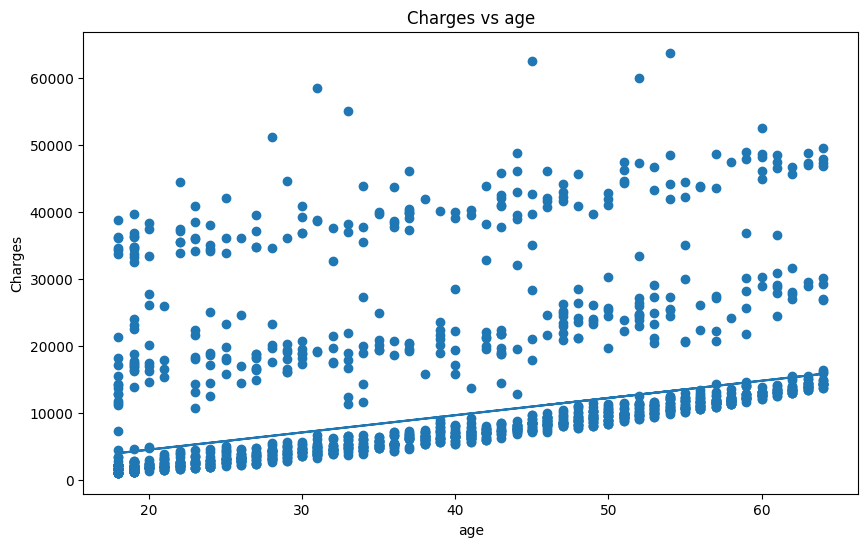

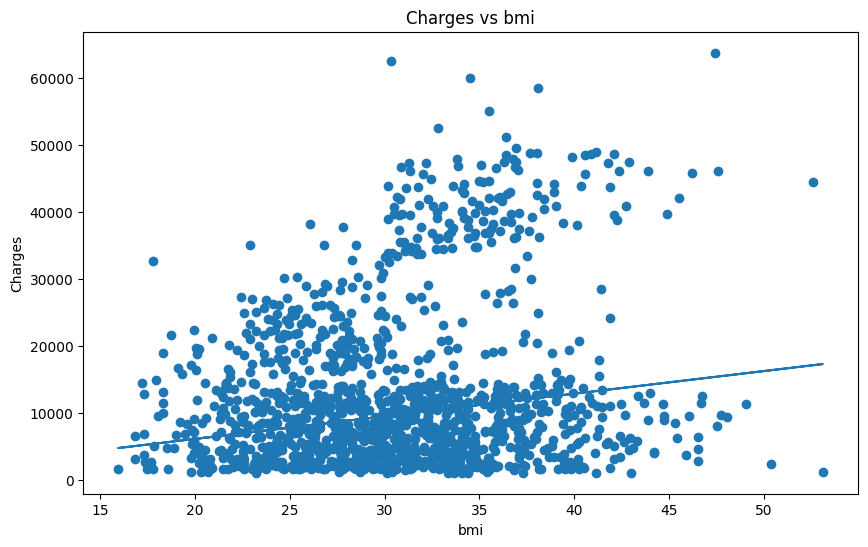

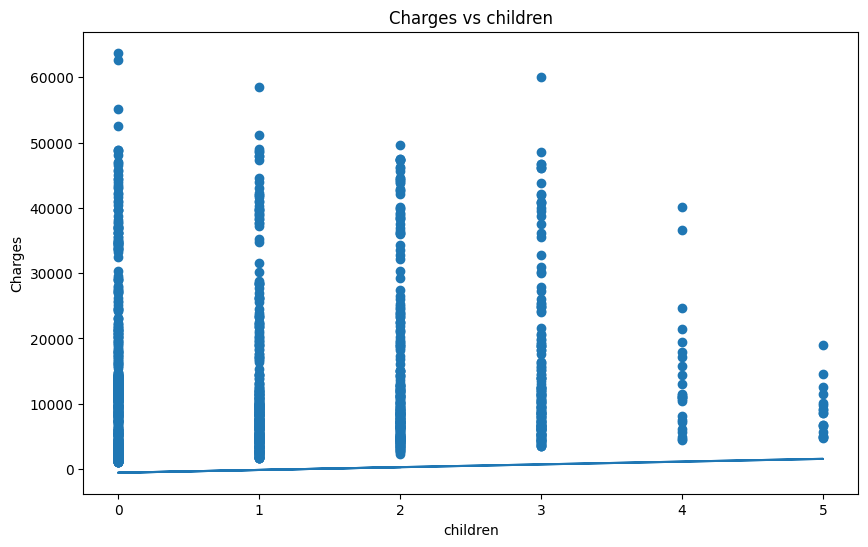

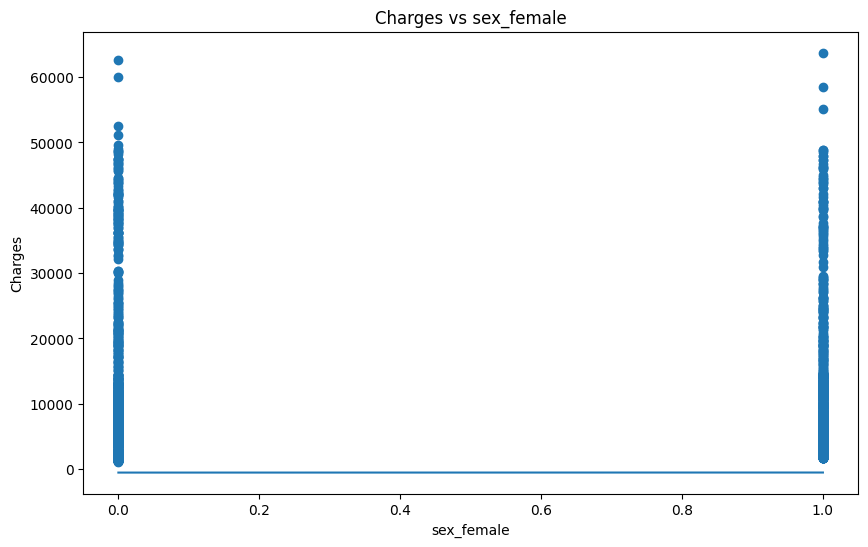

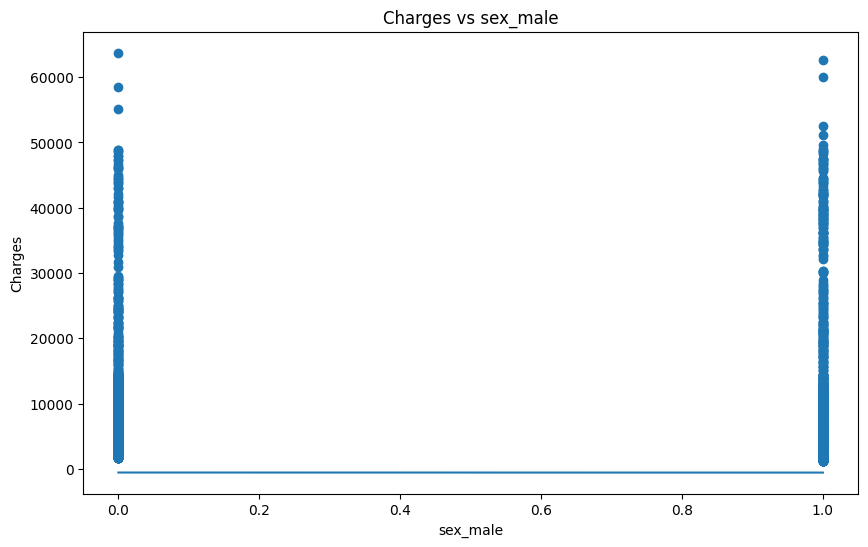

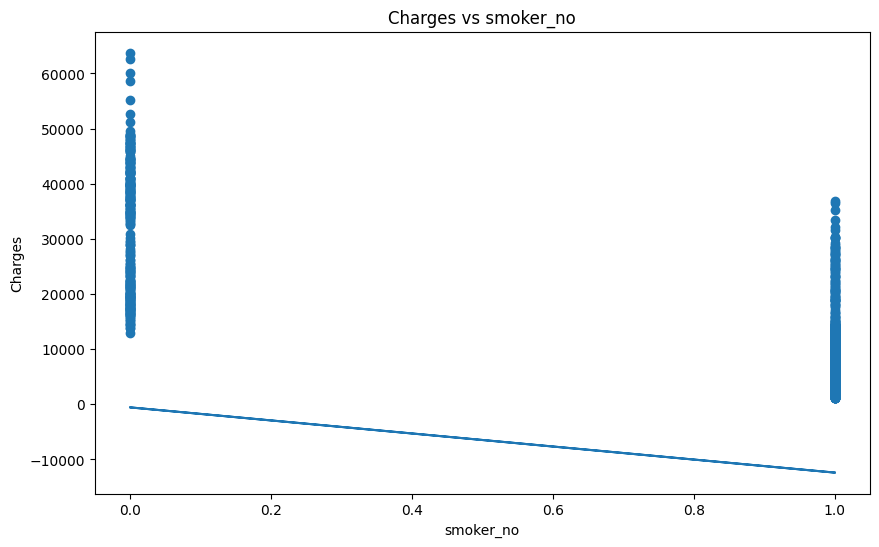

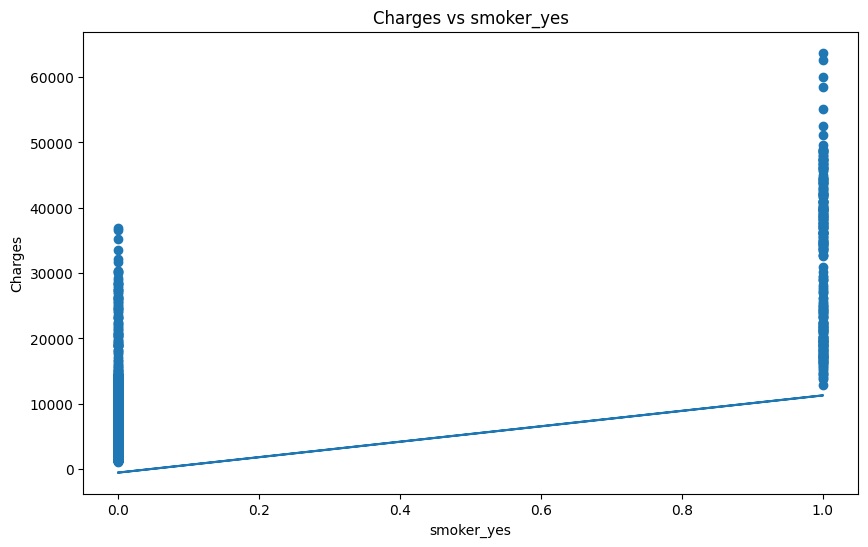

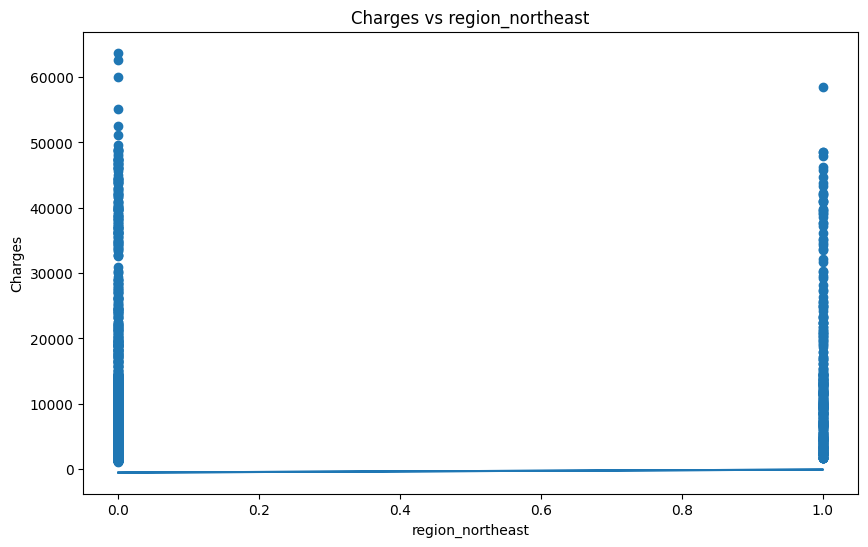

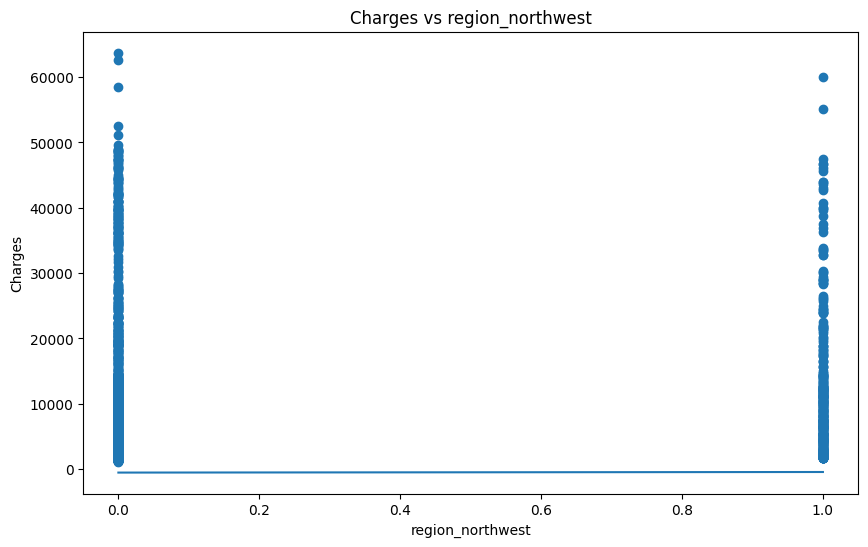

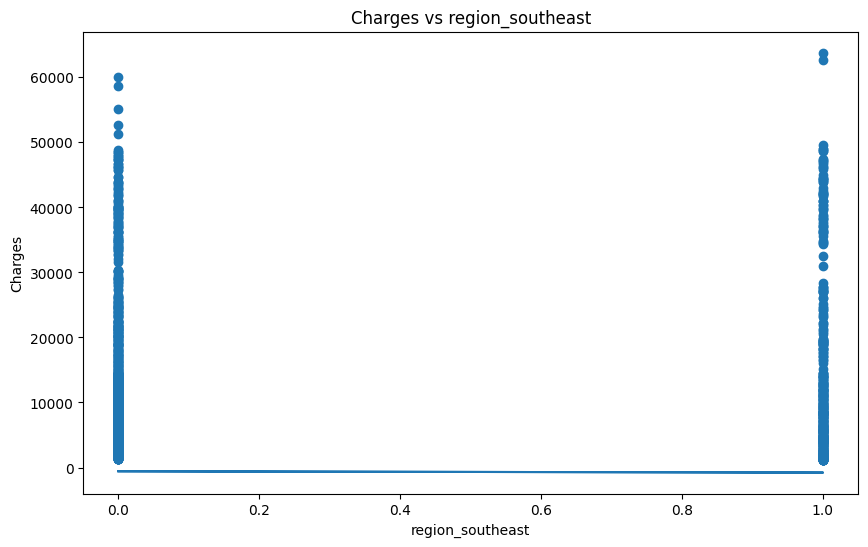

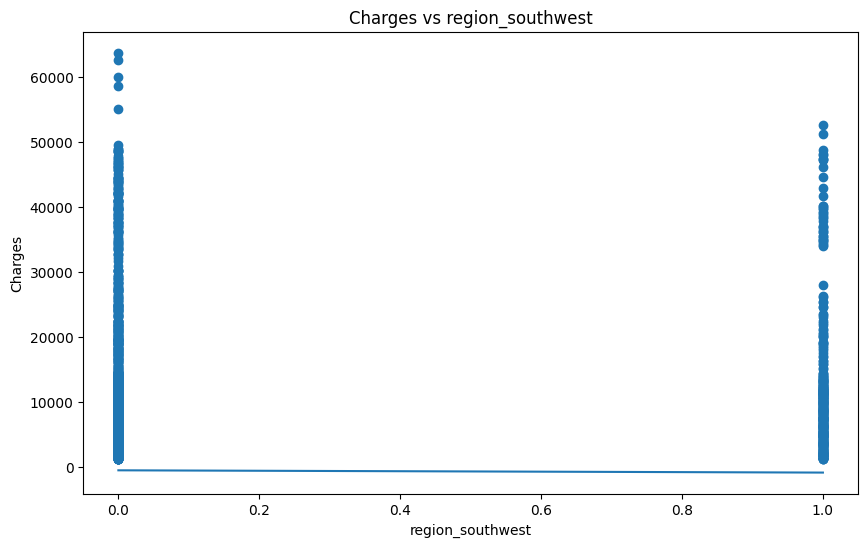

In [ ]:
coefficients = model.coef_
feature_names = X_train.columns
intercept = model.intercept_

if len(coefficients) == len(feature_names):
    coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

for i, feature in enumerate(feature_names):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df['charges'])
    plt.plot(X_train[feature], X_train[feature] * coefficients[i] + intercept)
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.title(f'Charges vs {feature}')
    plt.show()

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [ ]:
poly_transform = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_transform.fit_transform(X_train)
X_test_poly = poly_transform.transform(X_test)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_poly, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.220e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [ ]:
ridge_poly_model = Ridge(alpha=0.1)
ridge_poly_model.fit(X_train_poly, y_train)

Ridge(alpha=0.1)

Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

In [ ]:
y_pred_lasso = lasso_model.predict(X_train_poly)
y_pred_test_lasso = lasso_model.predict(X_test_poly)

mape_train_lasso = mean_absolute_percentage_error(y_train, y_pred_lasso)
mape_test_lasso = mean_absolute_percentage_error(y_test, y_pred_test_lasso)


y_pred_ridge = ridge_poly_model.predict(X_train_poly)
y_pred_test_ridge = ridge_poly_model.predict(X_test_poly)

mape_train_ridge = mean_absolute_percentage_error(y_train, y_pred_ridge)
mape_test_ridge = mean_absolute_percentage_error(y_test, y_pred_test_ridge)

Add extra variables to dataset to make model more complex, then compare the results.

In [ ]:
# TODO: Increase No. of dimensions using PolynomialFeatures from sklearn
poly = PolynomialFeatures(2)
terms = poly.fit_transform(X_train)

lasso_model = Lasso(alpha = 0.002)
lasso_model.fit(terms, y_train)

ridge_model = Ridge(alpha = 0.2)
ridge_model.fit(terms, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


Ridge(alpha=0.2)

Report your best model with its evaluated results.

In [ ]:
terms = poly.fit_transform(X_test)

predict_y1 = lasso_model.predict(terms)
predict_y2 = ridge_model.predict(terms)

mape_l1_test = mean_absolute_percentage_error(y_test, predict_y1)
mape_l1_train = mean_absolute_percentage_error(y_train, lasso_model.predict(poly.fit_transform(X_train)))
print(f"MAPE of L1 on test: {mape_l1_test}")
print(f"MAPE of L1 on train: {mape_l1_train}\n")

mape_l2_test = mean_absolute_percentage_error(y_test, predict_y2)
mape_l2_train = mean_absolute_percentage_error(y_train, ridge_model.predict(poly.fit_transform(X_train)))
print(f"MAPE of L2 on test: {mape_l2_test}")
print(f"MAPE of L2 on train: {mape_l2_train}\n")

mape_lr_test = mean_absolute_percentage_error(y_test, model.predict(X_test))
mape_lr_train = mean_absolute_percentage_error(y_train, model.predict(X_train))
print(f"MAPE of linear regression on test: {mape_lr_test}")
print(f"MAPE of linear regression on train: {mape_lr_train}")


MAPE of L1 on test: 0.3019854655375069
MAPE of L1 on train: 0.29399343856685084

MAPE of L2 on test: 0.30160977898274816
MAPE of L2 on train: 0.29359782048868194

MAPE of linear regression on test: 0.4688825597914675
MAPE of linear regression on train: 0.42202685080316404


In [ ]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

file_path = "./InsuranceData_test.csv"
df = pd.read_csv(file_path)

df = pd.get_dummies(df)

df = df.replace({True: 1, False: 0})

poly_test = PolynomialFeatures(2)
df = poly_test.fit_transform(df)
y_lasso_pred = lasso_model.predict(df)

y_lasso_pred = abs( y_lasso_pred)

a = pd.DataFrame({'charges':y_lasso_pred})
a.to_csv('submission.csv',index=False)

<ipython-input-163-d1c565071c11>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:**     L1 Regularization (Lasso): This method adds a penalty equal to the absolute value of the magnitude of coefficients. The result is a sparse model with many coefficients being exactly zero, effectively selecting a subset of features. This sparsity makes Lasso useful for feature selection.

    L2 Regularization (Ridge): Here, the penalty is the square of the magnitude of coefficients. Ridge regression does not force coefficients to be exactly zero, leading to smaller, evenly distributed weights but not necessarily eliminating any. This helps in managing multicollinearity and maintaining all features, albeit with reduced importance.</span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** Increasing the alpha value imposes a higher penalty on large coefficients, shrinking or eliminating them. This enhances model explainability by reducing complexity and spotlighting the most important features.</span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:**Regularization helps manage model complexity by penalizing large coefficients, thus reducing overfitting, particularly in high-dimensional feature spaces.</span>